# U23AI118
## Lab 2 : Analyzing NYC Dataset

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv('yellow_tripdata_sample.csv')
print("Shape = ", df.shape)
print("Columns:", df.columns.tolist()) # tolist gives proper structure
print("Initial row", df.head())

Shape =  (995, 19)
Columns: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']
Initial row    VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2024-01-01 00:57:55   2024-01-01 01:17:43              1.0   
1         1  2024-01-01 00:03:00   2024-01-01 00:09:36              1.0   
2         1  2024-01-01 00:17:06   2024-01-01 00:35:01              1.0   
3         1  2024-01-01 00:36:38   2024-01-01 00:44:56              1.0   
4         1  2024-01-01 00:46:51   2024-01-01 00:52:57              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.72         1.0                  N           186            79   
1           1.80        

In [79]:
# Analysing before Data Cleaning
print("Info :",df.info())
print("Missing Values :")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               995 non-null    int64  
 1   tpep_pickup_datetime   995 non-null    object 
 2   tpep_dropoff_datetime  995 non-null    object 
 3   passenger_count        995 non-null    float64
 4   trip_distance          995 non-null    float64
 5   RatecodeID             995 non-null    float64
 6   store_and_fwd_flag     995 non-null    object 
 7   PULocationID           995 non-null    int64  
 8   DOLocationID           995 non-null    int64  
 9   payment_type           995 non-null    int64  
 10  fare_amount            995 non-null    float64
 11  extra                  995 non-null    float64
 12  mta_tax                995 non-null    float64
 13  tip_amount             995 non-null    float64
 14  tolls_amount           995 non-null    float64
 15  improv

In [80]:
df_clean = df.copy()

# Filter out invalid values
df_clean = df_clean[
    (df_clean['passenger_count'] > 0) & 
    (df_clean['passenger_count'] <= 8) &
    (df_clean['trip_distance'] > 0) & 
    (df_clean['trip_distance'] <= 100) &
    (df_clean['fare_amount'] > 0) & 
    (df_clean['fare_amount'] <= 500) &
    (df_clean['total_amount'] > 0) & 
    (df_clean['total_amount'] <= 500) &
    (df_clean['tip_amount'] >= 0) & 
    (df_clean['tip_amount'] <= 100) &
    (df_clean['extra'] >= 0)
]

print(f"Original dataset size: {len(df)}")
print(f"Cleaned dataset size: {len(df_clean)}")
print(f"Removed {len(df) - len(df_clean)} rows ({((len(df) - len(df_clean))/len(df)*100):.2f}%)")

Original dataset size: 995
Cleaned dataset size: 968
Removed 27 rows (2.71%)


In [81]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
mean,1.703518,1.581910,2.890472,1.138693,165.323618,163.204020,1.228141,18.278593,1.741457,0.491960,3.483146,0.197357,0.988945,26.847538,2.326633,0.052764
std,0.456936,0.911625,3.125268,3.126260,67.808656,73.059288,0.486448,14.916422,1.255742,0.077276,4.195507,1.180907,0.144929,18.092018,0.673846,0.309523
min,1.000000,0.000000,0.000000,1.000000,4.000000,4.000000,1.000000,-47.800000,-1.000000,-0.500000,0.000000,0.000000,-1.000000,-52.800000,-2.500000,-1.750000
25%,1.000000,1.000000,1.125000,1.000000,114.000000,107.000000,1.000000,9.300000,1.000000,0.500000,0.000000,0.000000,1.000000,16.320000,2.500000,0.000000
50%,2.000000,1.000000,1.960000,1.000000,161.000000,162.000000,1.000000,14.200000,1.000000,0.500000,3.000000,0.000000,1.000000,22.200000,2.500000,0.000000
75%,2.000000,2.000000,3.400000,1.000000,236.000000,236.000000,1.000000,22.600000,3.500000,0.500000,4.820000,0.000000,1.000000,31.770000,2.500000,0.000000
max,2.000000,6.000000,23.900000,99.000000,265.000000,265.000000,4.000000,180.000000,7.750000,0.500000,80.000000,12.750000,1.000000,217.200000,2.500000,1.750000


In [82]:
numerical_cols = ['passenger_count', 'trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'extra']
def descriptive_stats(data,column):     #Description of data function
    stats_dict = {
        'mean' : data[column].mean(),
        'median': data[column].median(),
        'mode': data[column].mode().iloc[0] if not data[column].mode().empty else np.nan,
        'min': data[column].min(),
        'max': data[column].max(),
        'std': data[column].std(),
        'variance': data[column].var(),
        'skew': data[column].skew(),
        'kurtosis': data[column].kurtosis()
    }
    return stats_dict
stats_summary = {}
for col in numerical_cols:
    stats_summary[col] = descriptive_stats(df_clean ,  col )

stats_df = pd.DataFrame(stats_summary).round(4)   # pd.Datafram() - Converting into tabular form

stats_df

,passenger_count,trip_distance,fare_amount,total_amount,tip_amount,extra
mean,1.6033,2.9154,18.4021,27.0301,3.4819,1.7371
median,1.0000,1.9800,14.2000,22.2000,3.0000,1.0000
mode,1.0000,0.9000,6.5000,16.3200,0.0000,1.0000
min,1.0000,0.0100,3.0000,7.6000,0.0000,0.0000
max,6.0000,23.9000,125.5000,165.6400,80.0000,7.7500
std,0.9037,3.1103,13.5733,16.4536,4.0774,1.2323
variance,0.8166,9.6739,184.2334,270.7200,16.6254,1.5186
skew,1.7247,3.3208,2.5125,2.6814,7.6468,1.2739
kurtosis,2.8847,14.2673,10.2395,11.5664,129.1305,0.9350


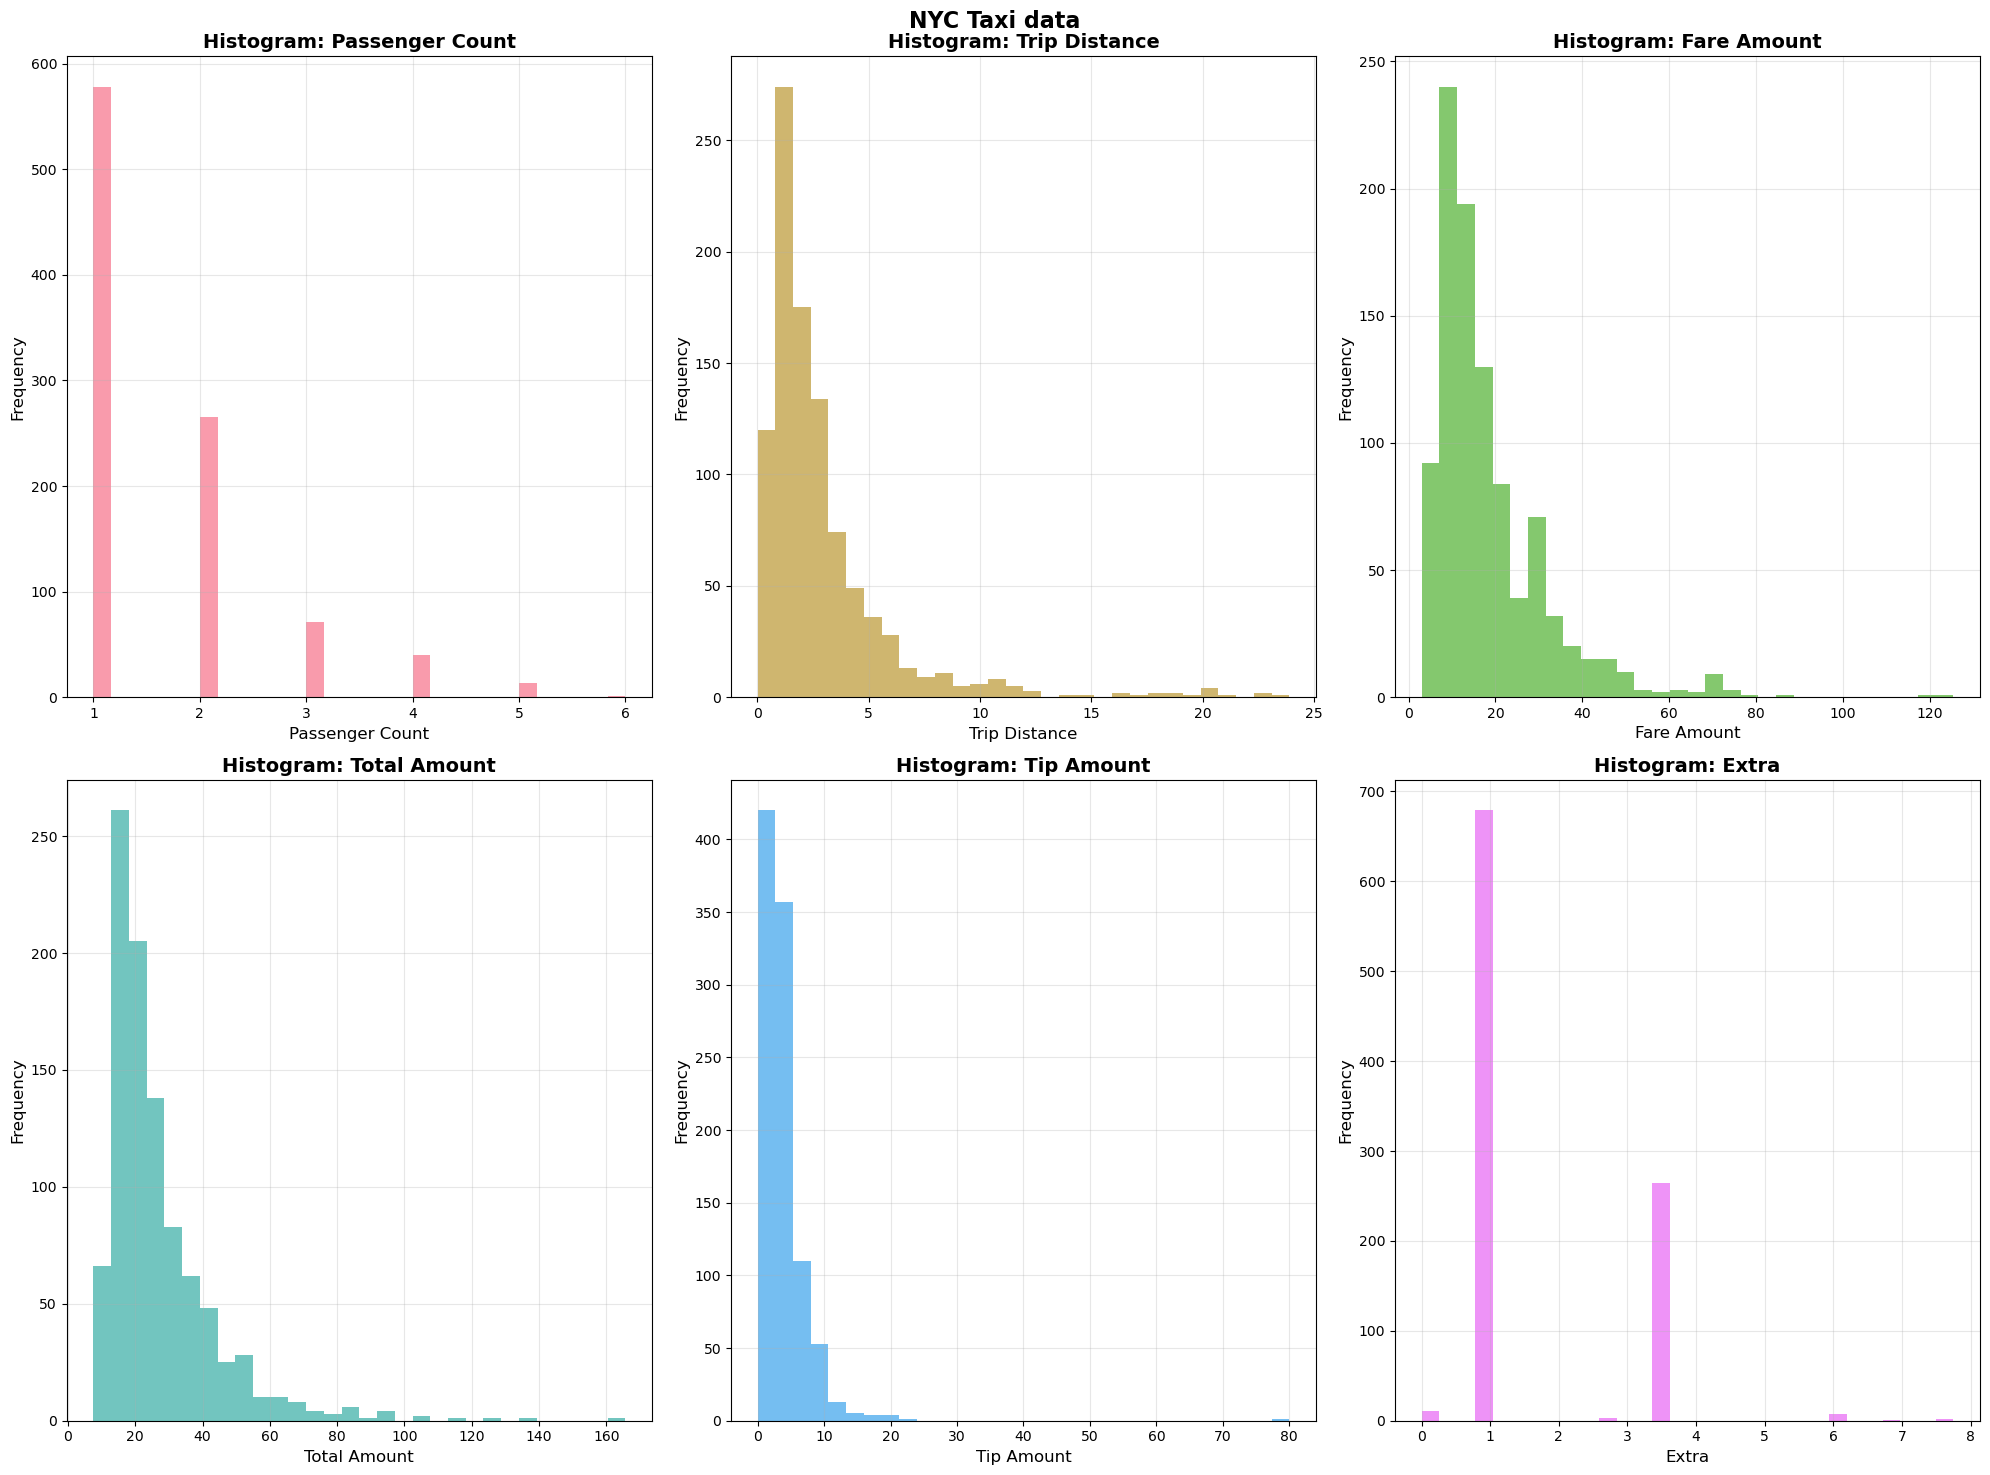

In [83]:
fig, axes = plt.subplots(2, 3, figsize = (20,15))
fig.suptitle('NYC Taxi data', fontsize = 16, fontweight = 'bold')

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].hist(df_clean[col], bins =30 , alpha = 0.7, color=sns.color_palette("husl", len(numerical_cols))[i])
    axes[i].set_title(f'Histogram: {col.replace("_"," ").title()}', fontsize = 14, fontweight = 'bold')
    axes[i].set_xlabel(col.replace("_"," ").title(), fontsize = 12)
    axes[i].set_ylabel('Frequency', fontsize =12)
    axes[i].grid(True, alpha = 0.3)

plt.tight_layout()
plt.show()

All graphs are right skewed

1) Single passenger travels more
2) Most people travel within range of 0-5 km
3) Generally fares are below $40
4) Total amout comes between $0 - $60
5) people generally tips below $ 10
6) Extras are either 1 or 4


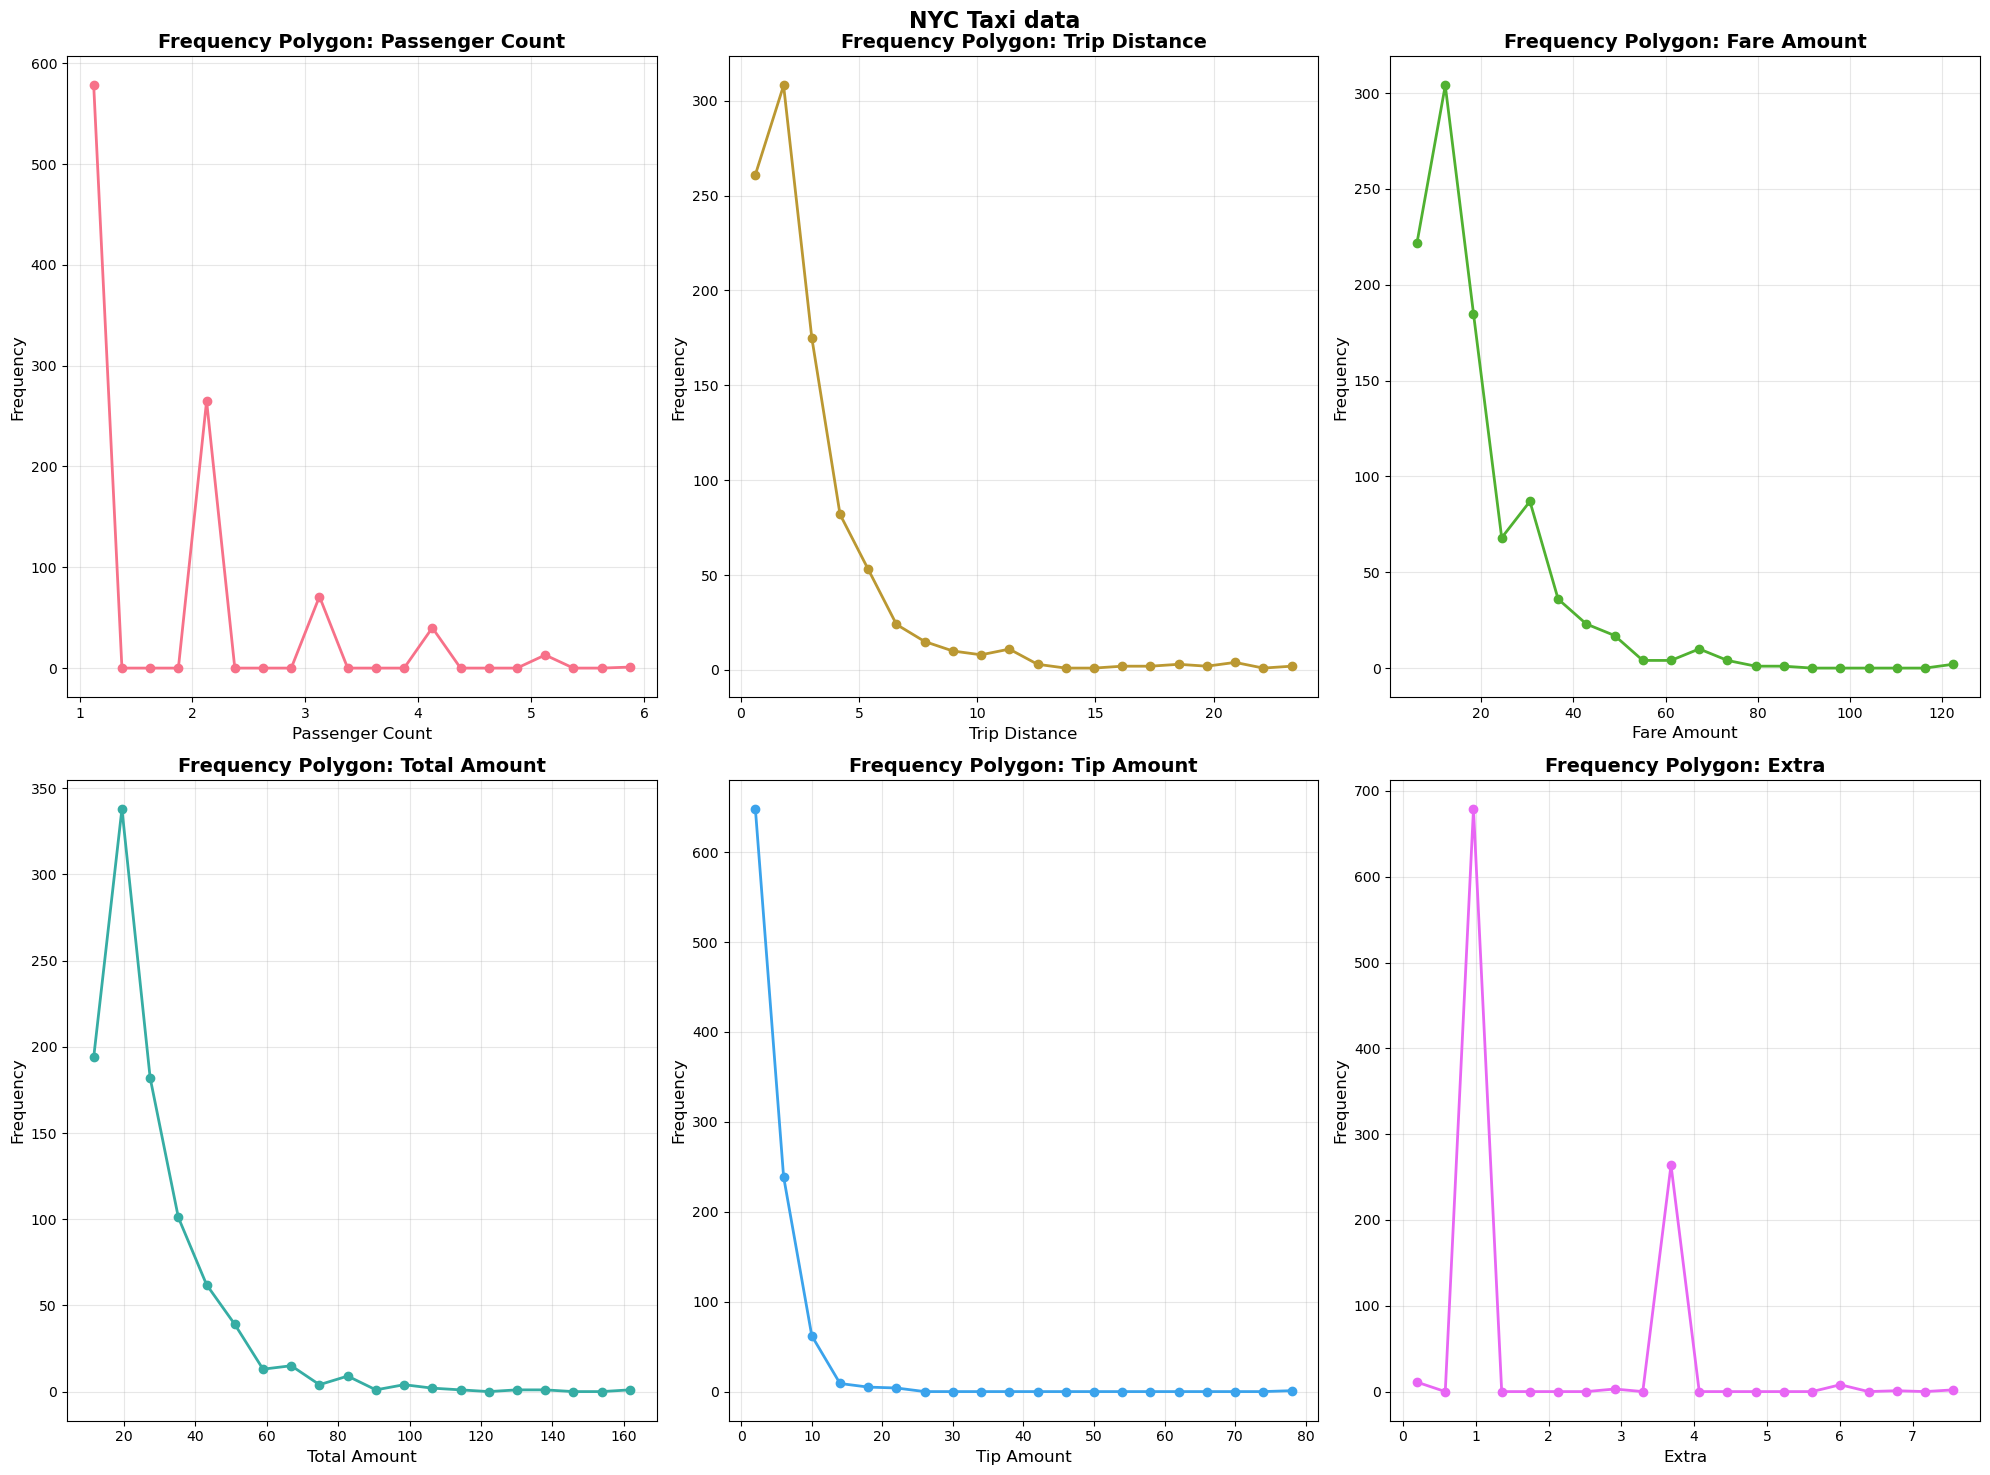

In [84]:
fig, axes = plt.subplots(2, 3, figsize = (20,15))
fig.suptitle('NYC Taxi data', fontsize = 16, fontweight = 'bold')

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    hist_data, bin_edges = np.histogram(df_clean[col], bins=20)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    axes[i].plot(bin_centers, hist_data, marker='o', linestyle='-', 
                linewidth=2, markersize=6, 
                color=sns.color_palette("husl", len(numerical_cols))[i])
    axes[i].set_title(f'Frequency Polygon: {col.replace("_"," ").title()}', fontsize = 14, fontweight = 'bold')
    axes[i].set_xlabel(col.replace("_"," ").title(), fontsize = 12)
    axes[i].set_ylabel('Frequency', fontsize =12)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

All Observations are same as they were in histogram :
1) Single passenger travels more
2) Most people travel within range of 0-5 km
3) Generally fares are below $40
4) Total amout comes between $0 - $60
5) people generally tips below $ 10
6) Extras are either 1 or 4

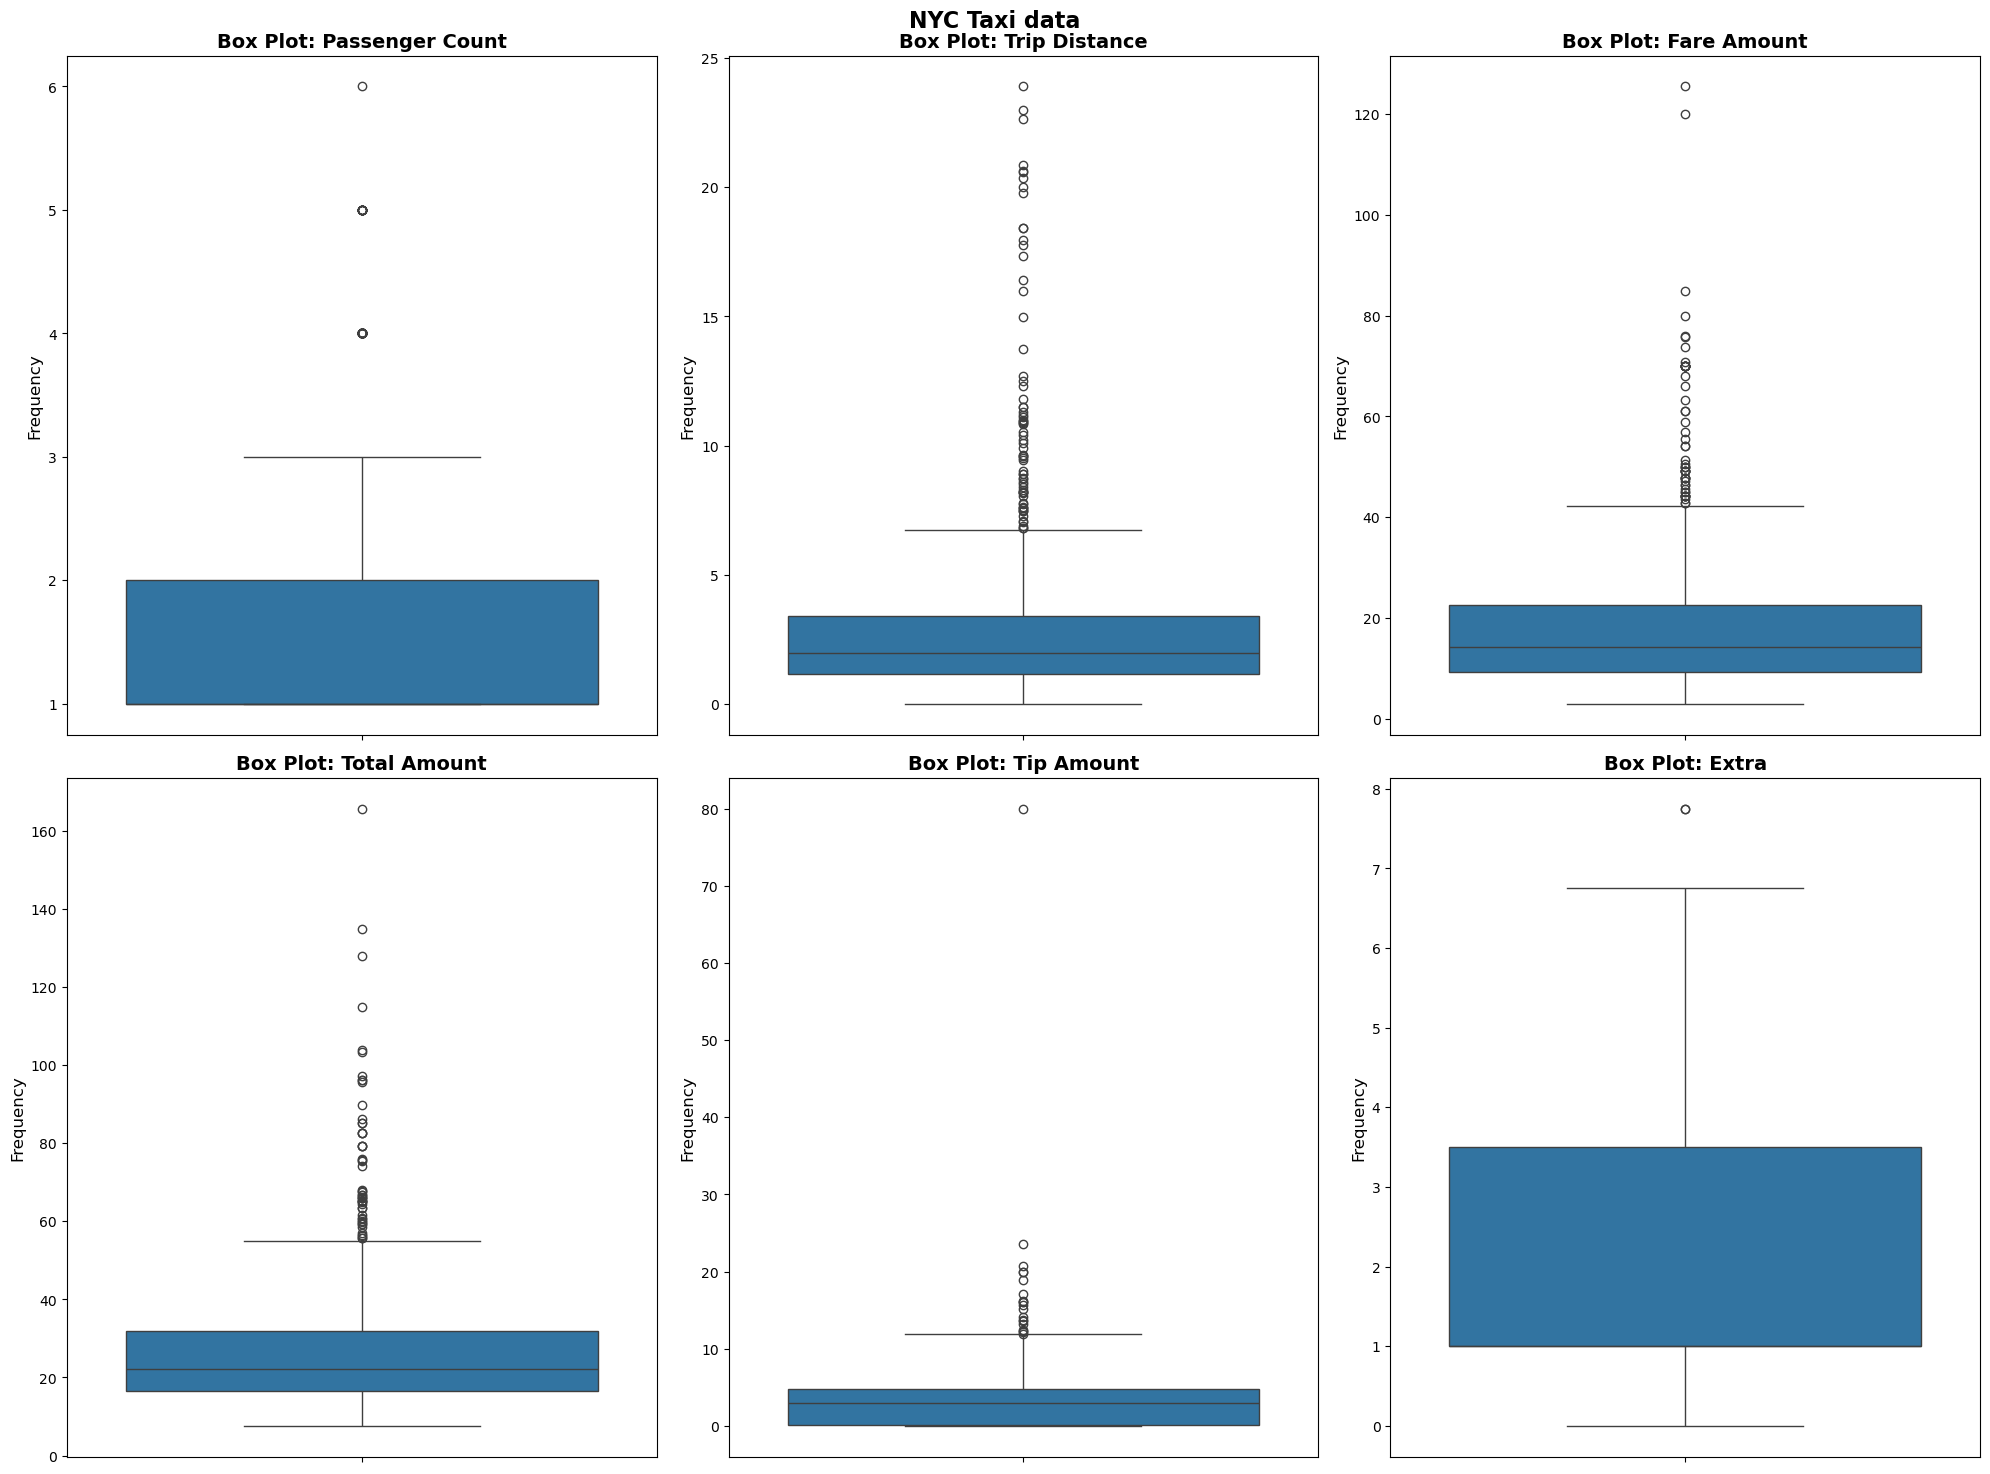

In [85]:
fig, axes = plt.subplots(2, 3, figsize = (20,15))
fig.suptitle('NYC Taxi data', fontsize = 16, fontweight = 'bold')

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df_clean[col], ax=axes[i])
    axes[i].set_title(f'Box Plot: {col.replace("_"," ").title()}', fontsize = 14, fontweight = 'bold')
    axes[i].set_ylabel('Frequency', fontsize =12)

plt.tight_layout()
plt.show()

Observations : 

1) There are 3 outlier points , Q1 is 1 and Q3 is 2 outside 3 are outliers
2) There are many outliers , Q1 is around 1 median is around 3 Q3 is around 4 and outside 0-7 are outliers
3) There are many outliers , Q1 is around 9 median is around 18 Q3 is around 22 and outside 0-42 are outliers
4) There are many outliers , Q1 is around 16 median is around 27 Q3 is around 31 and outside 10-55 are outliers
5) There are few outliers , Q1 is 0 median is around 3 Q3 is around 5 and outside 12 are outliers
6) There is  one outliers , Q1 is 1 median is around 2 Q3 is around 3.5 and outside 7 are outlier

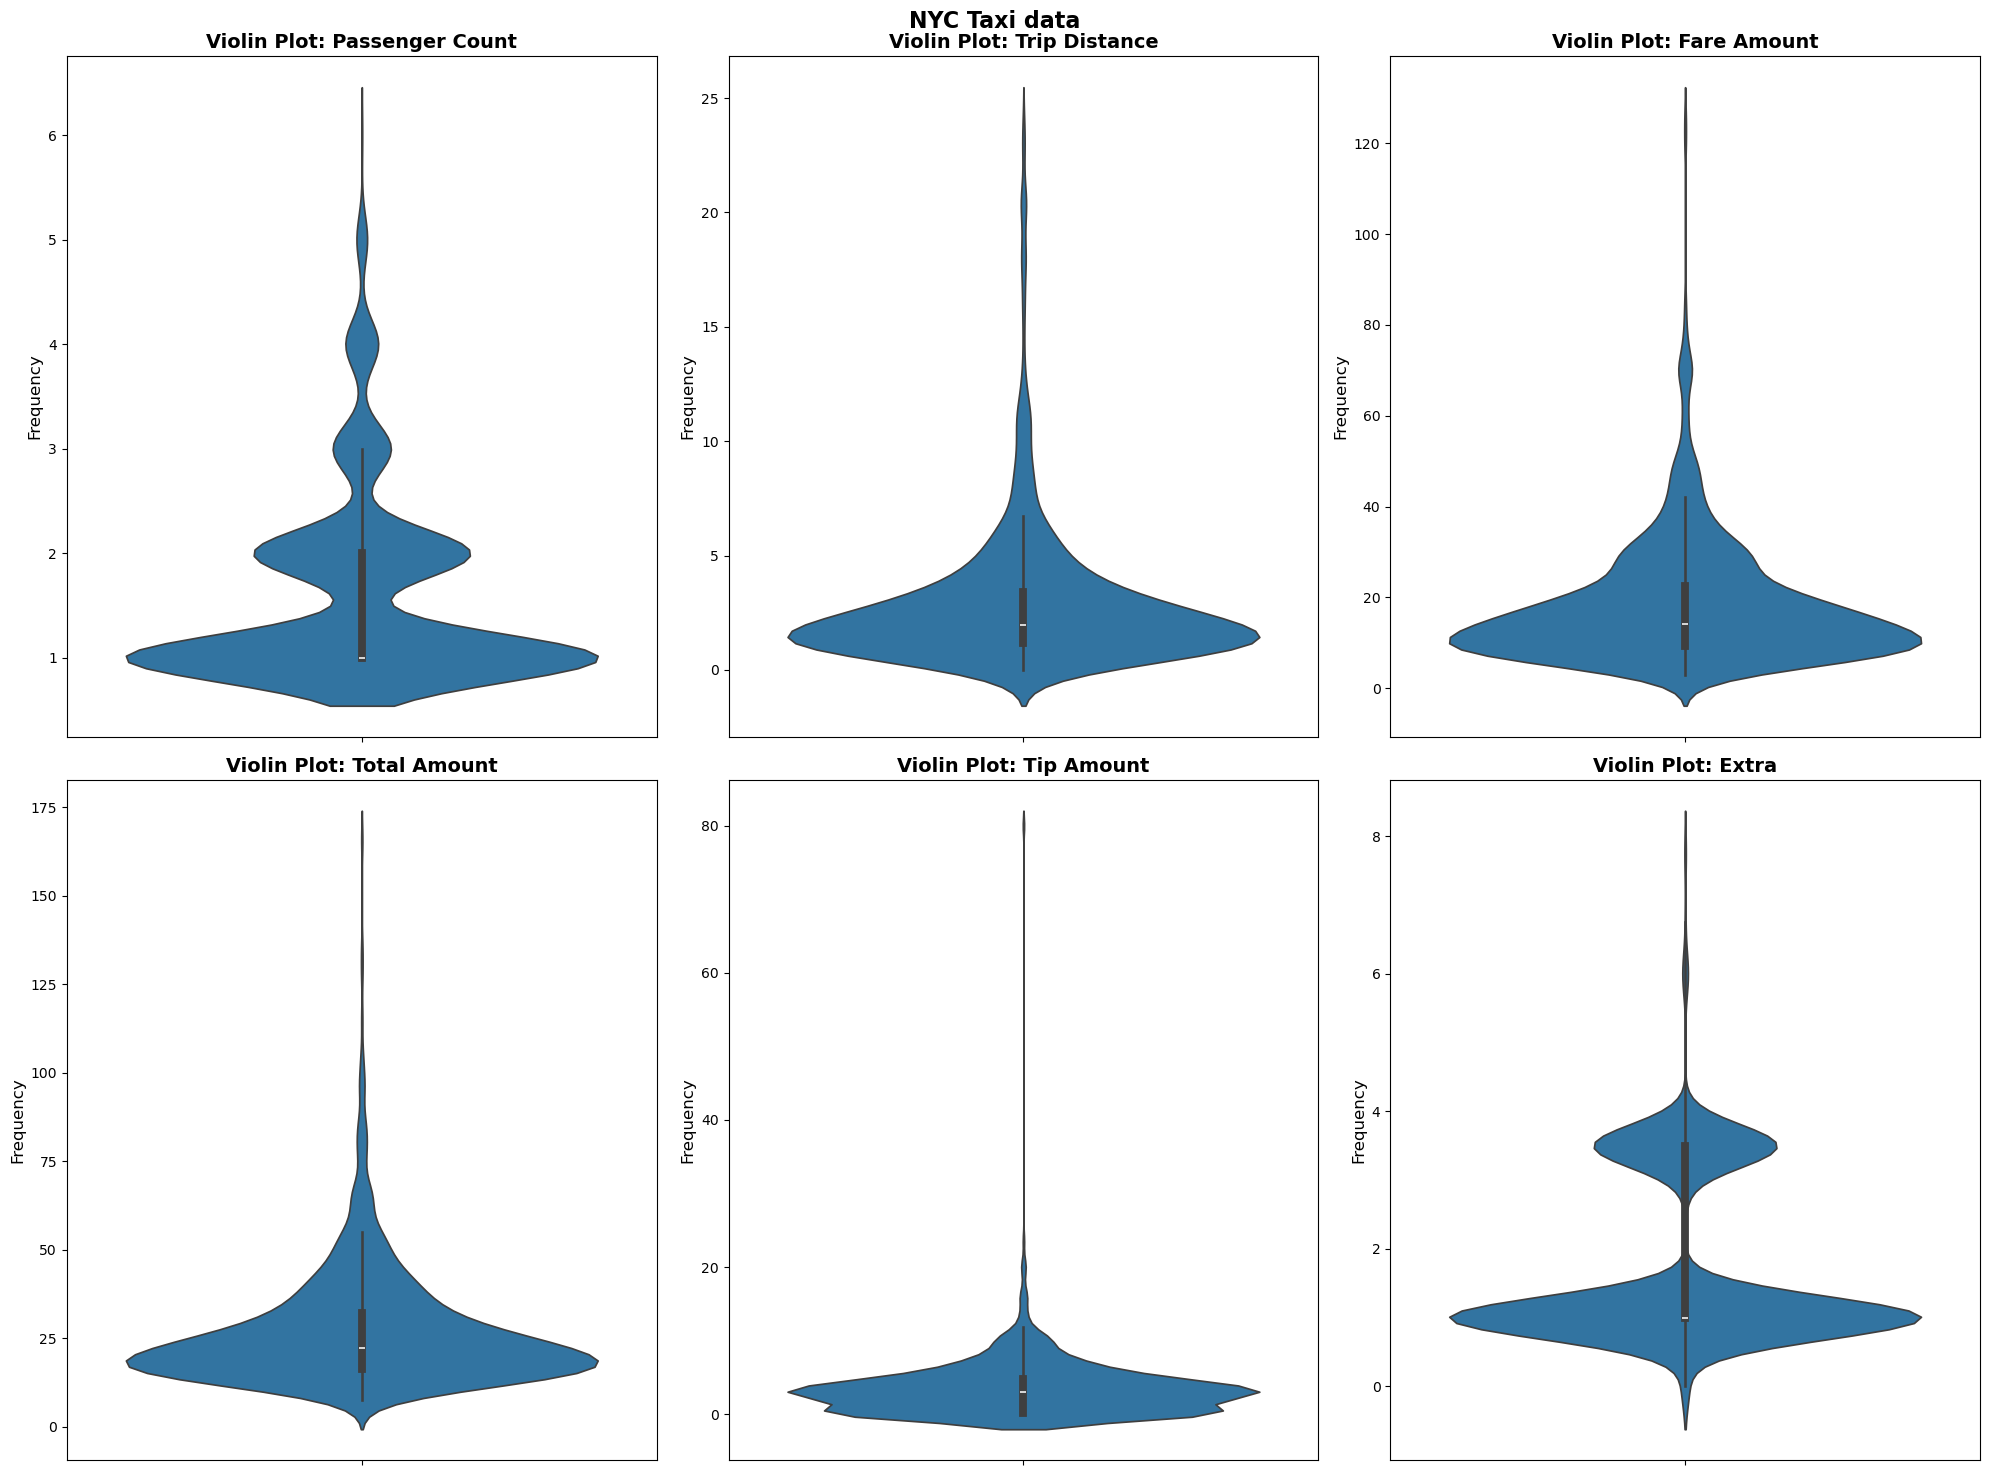

In [86]:
fig, axes = plt.subplots(2, 3, figsize = (20,15))
fig.suptitle('NYC Taxi data', fontsize = 16, fontweight = 'bold')

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.violinplot(y=df_clean[col], ax=axes[i])
    axes[i].set_title(f'Violin Plot: {col.replace("_"," ").title()}', fontsize = 14, fontweight = 'bold')
    axes[i].set_ylabel('Frequency', fontsize =12)

plt.tight_layout()
plt.show()

Observation :
Mixture of frequency distribution with box plot
Wherever the graph is stretch have more frequency
1) Most frequency in about 1
2) Most frequency is about 1
3) Most frquency is about 7
4) Most frquency is about 16
5) Most frquency is about 0
6) Most frquency is about 1

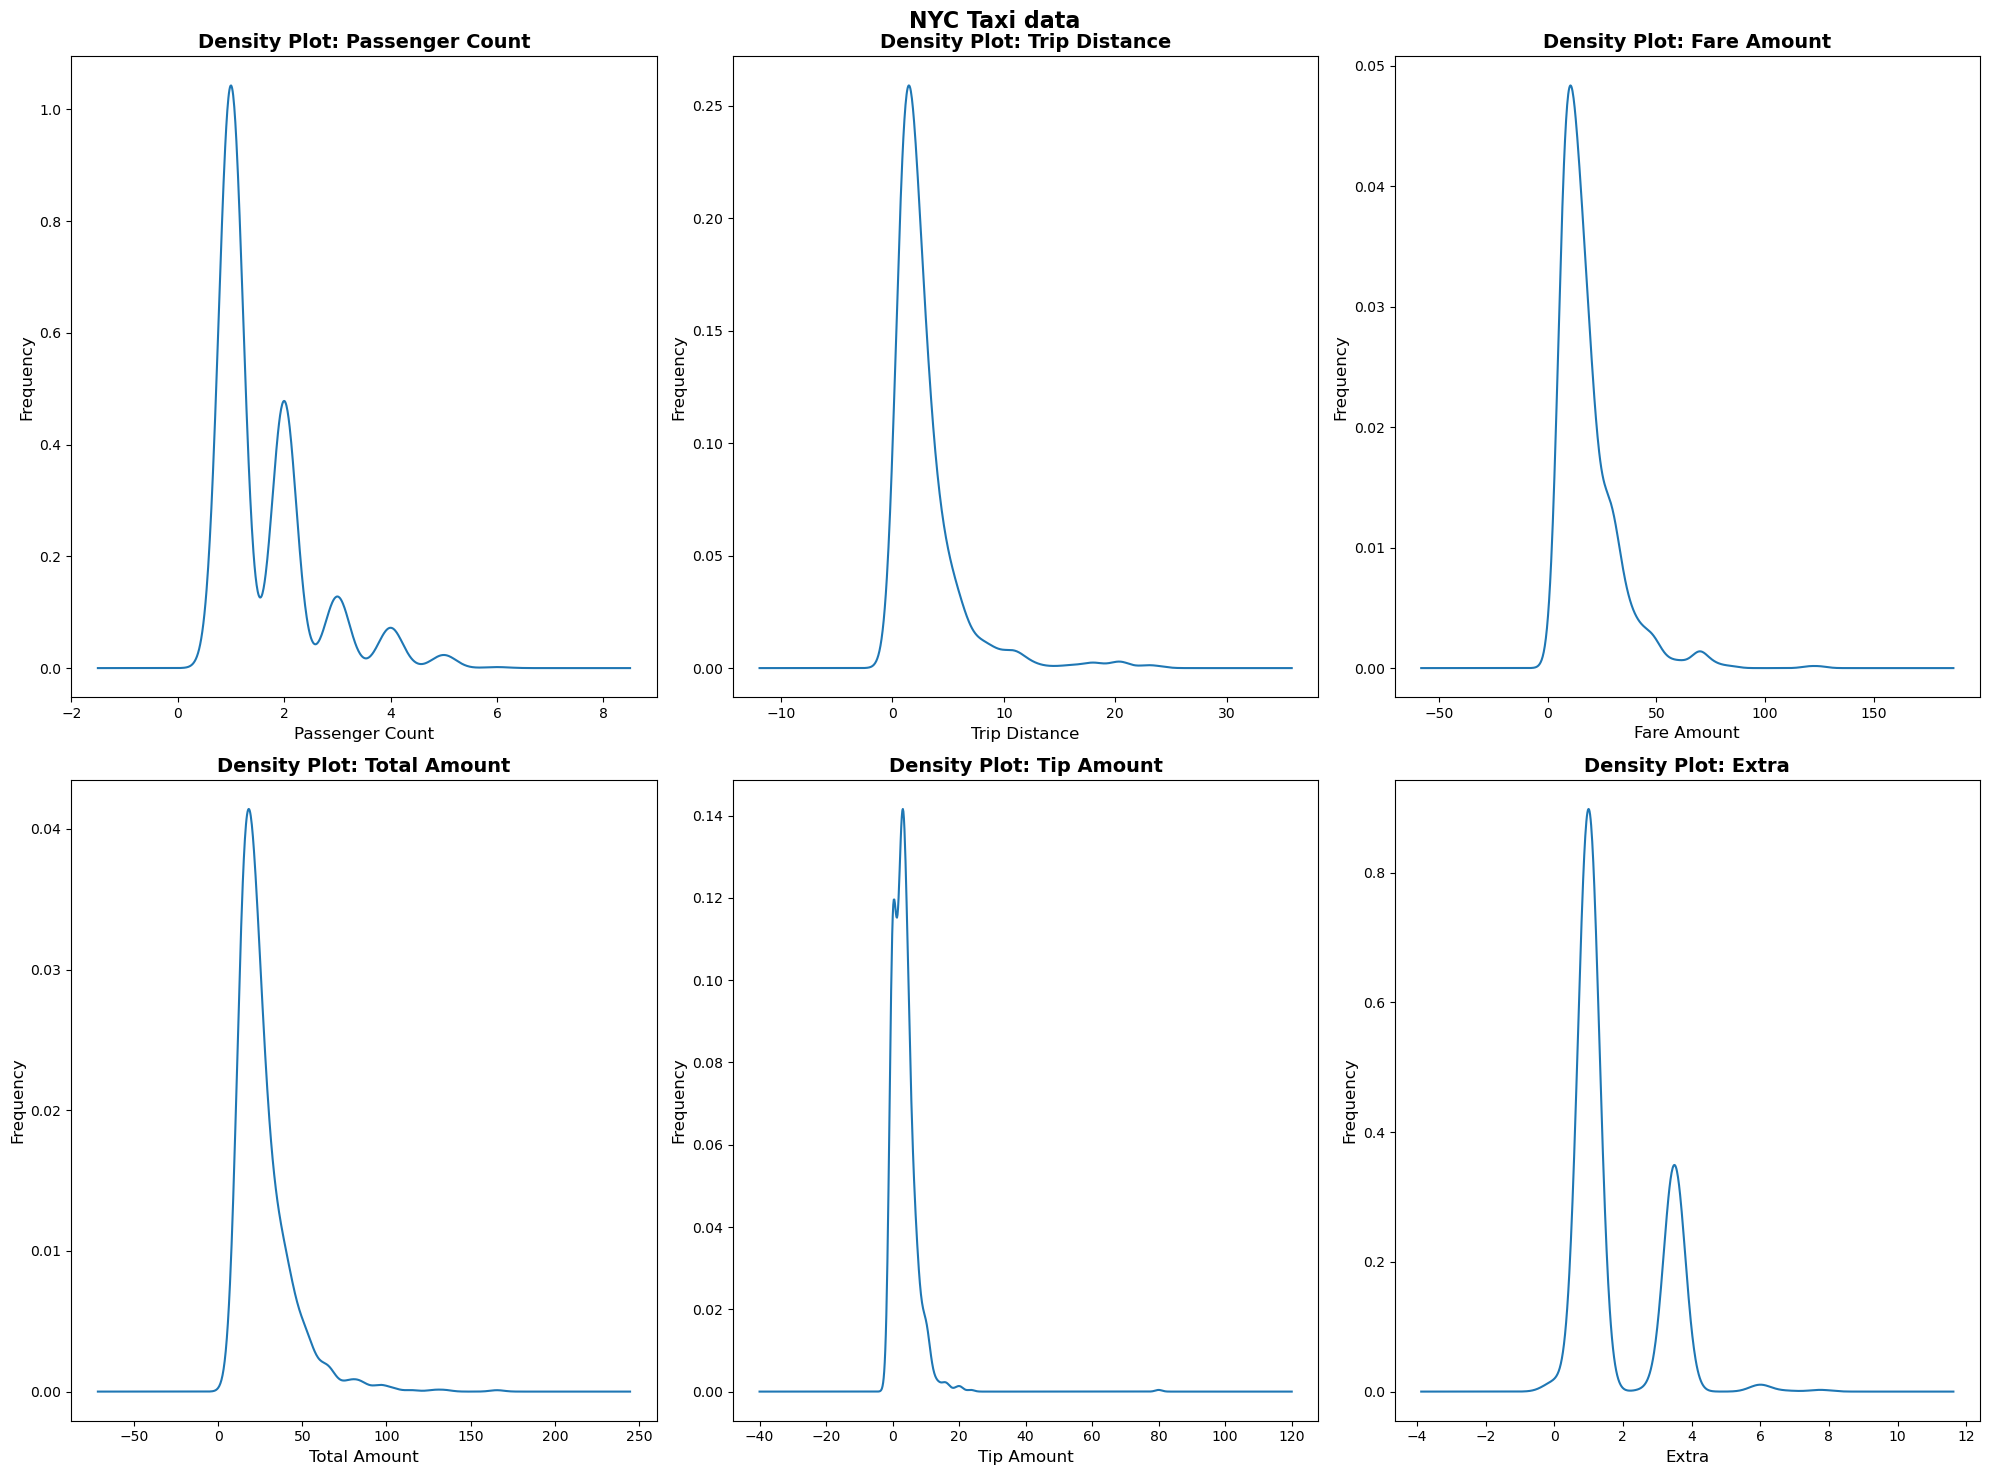

In [87]:
fig, axes = plt.subplots(2, 3, figsize = (20,15))
fig.suptitle('NYC Taxi data', fontsize = 16, fontweight = 'bold')


axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    df_clean[col].plot(kind='density', ax=axes[i])
    axes[i].set_title(f'Density Plot: {col.replace("_"," ").title()}', fontsize = 14, fontweight = 'bold')
    axes[i].set_xlabel(col.replace("_"," ").title(), fontsize = 12)
    axes[i].set_ylabel('Frequency', fontsize =12)

plt.tight_layout()
plt.show()

Observation : 
Shows where the density is highest
1) Most density is about 1
2) Most density is about 1
3) Most density is about 7
4) Most density is about 16
5) Most density is about 0
6) Most density is about 1

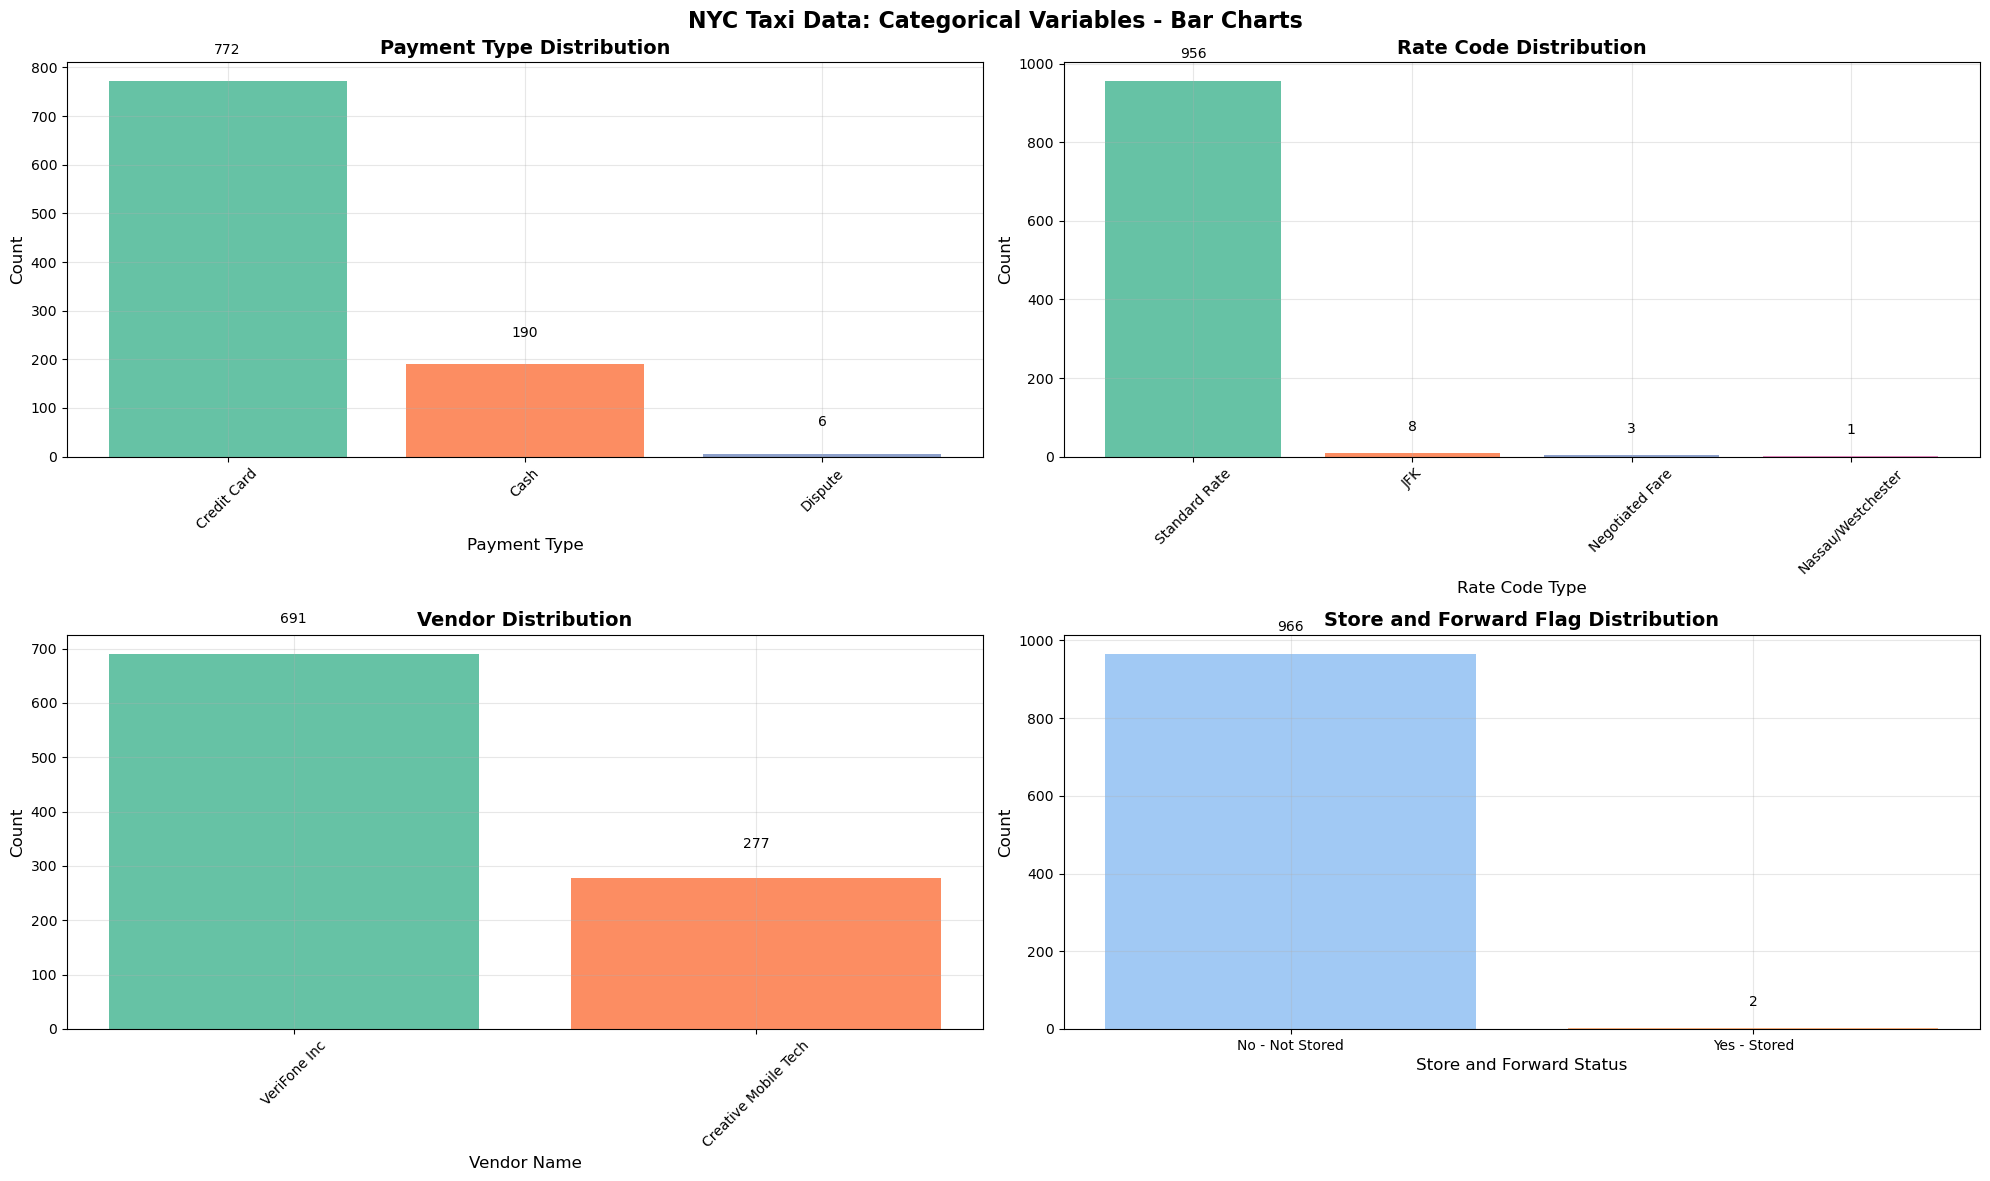

In [88]:
# Create mapping dictionaries for better labels
payment_type_map = {
    1: 'Credit Card',
    2: 'Cash', 
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}

ratecode_map = {
    1: 'Standard Rate',
    2: 'JFK',
    3: 'Newark', 
    4: 'Nassau/Westchester',
    5: 'Negotiated Fare',
    6: 'Group Ride'
}

vendor_map = {
    1: 'Creative Mobile Tech',
    2: 'VeriFone Inc'
}

flag_map = {
    'Y': 'Yes - Stored',
    'N': 'No - Not Stored'
}

fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('NYC Taxi Data: Categorical Variables - Bar Charts', fontsize=16, fontweight='bold')

axes = axes.flatten()

# Payment Type Distribution
pymnt_count = df_clean['payment_type'].value_counts()
payment_labels = [payment_type_map.get(code, f'Code {code}') for code in pymnt_count.index]
axes[0].bar(payment_labels, pymnt_count.values, color=sns.color_palette("Set2", len(pymnt_count)))
axes[0].set_title('Payment Type Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Payment Type', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

for i, v in enumerate(pymnt_count.values):
    axes[0].text(i, v + 50, str(v), ha='center', va='bottom')

# Rate Code ID Distribution
rcid_count = df_clean['RatecodeID'].value_counts()
ratecode_labels = [ratecode_map.get(code, f'Code {code}') for code in rcid_count.index]
axes[1].bar(ratecode_labels, rcid_count.values, color=sns.color_palette("Set2", len(rcid_count)))
axes[1].set_title('Rate Code Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Rate Code Type', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

for i, v in enumerate(rcid_count.values):
    axes[1].text(i, v + 50, str(v), ha='center', va='bottom')

# Vendor ID Distribution
vend_count = df_clean['VendorID'].value_counts()
vendor_labels = [vendor_map.get(code, f'Vendor {code}') for code in vend_count.index]
axes[2].bar(vendor_labels, vend_count.values, color=sns.color_palette("Set2", len(vend_count)))
axes[2].set_title('Vendor Distribution', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Vendor Name', fontsize=12)
axes[2].set_ylabel('Count', fontsize=12)
axes[2].grid(True, alpha=0.3)
axes[2].tick_params(axis='x', rotation=45)

for i, v in enumerate(vend_count.values):
    axes[2].text(i, v + 50, str(v), ha='center', va='bottom')

# Store and Forward Flag Distribution
flag_counts = df_clean['store_and_fwd_flag'].value_counts()
flag_labels = [flag_map.get(flag, flag) for flag in flag_counts.index]
axes[3].bar(flag_labels, flag_counts.values, 
            color=sns.color_palette("pastel", len(flag_counts)))
axes[3].set_title('Store and Forward Flag Distribution', fontsize=14, fontweight='bold')
axes[3].set_xlabel('Store and Forward Status', fontsize=12)
axes[3].set_ylabel('Count', fontsize=12)
axes[3].grid(True, alpha=0.3)

for i, v in enumerate(flag_counts.values):
    axes[3].text(i, v + 50, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Observations:

1. PAYMENT TYPE:

Credit Card: 772 trips (79.8%)
Cash: 190 trips (19.6%)
Dispute: 6 trips (0.6%)

2. RATE CODE ID:

Standard Rate: 956 trips (98.8%)
JFK: 8 trips (0.8%)
Negotiated Fare: 3 trips (0.3%)
Nassau/Westchester: 1 trips (0.1%)

3. VENDOR ID:

VeriFone Inc: 691 trips (71.4%)
Creative Mobile Tech: 277 trips (28.6%)

4. STORE AND FORWARD FLAG:

No - Not Stored: 966 trips (99.8%)
Yes - Stored: 2 trips (0.2%)

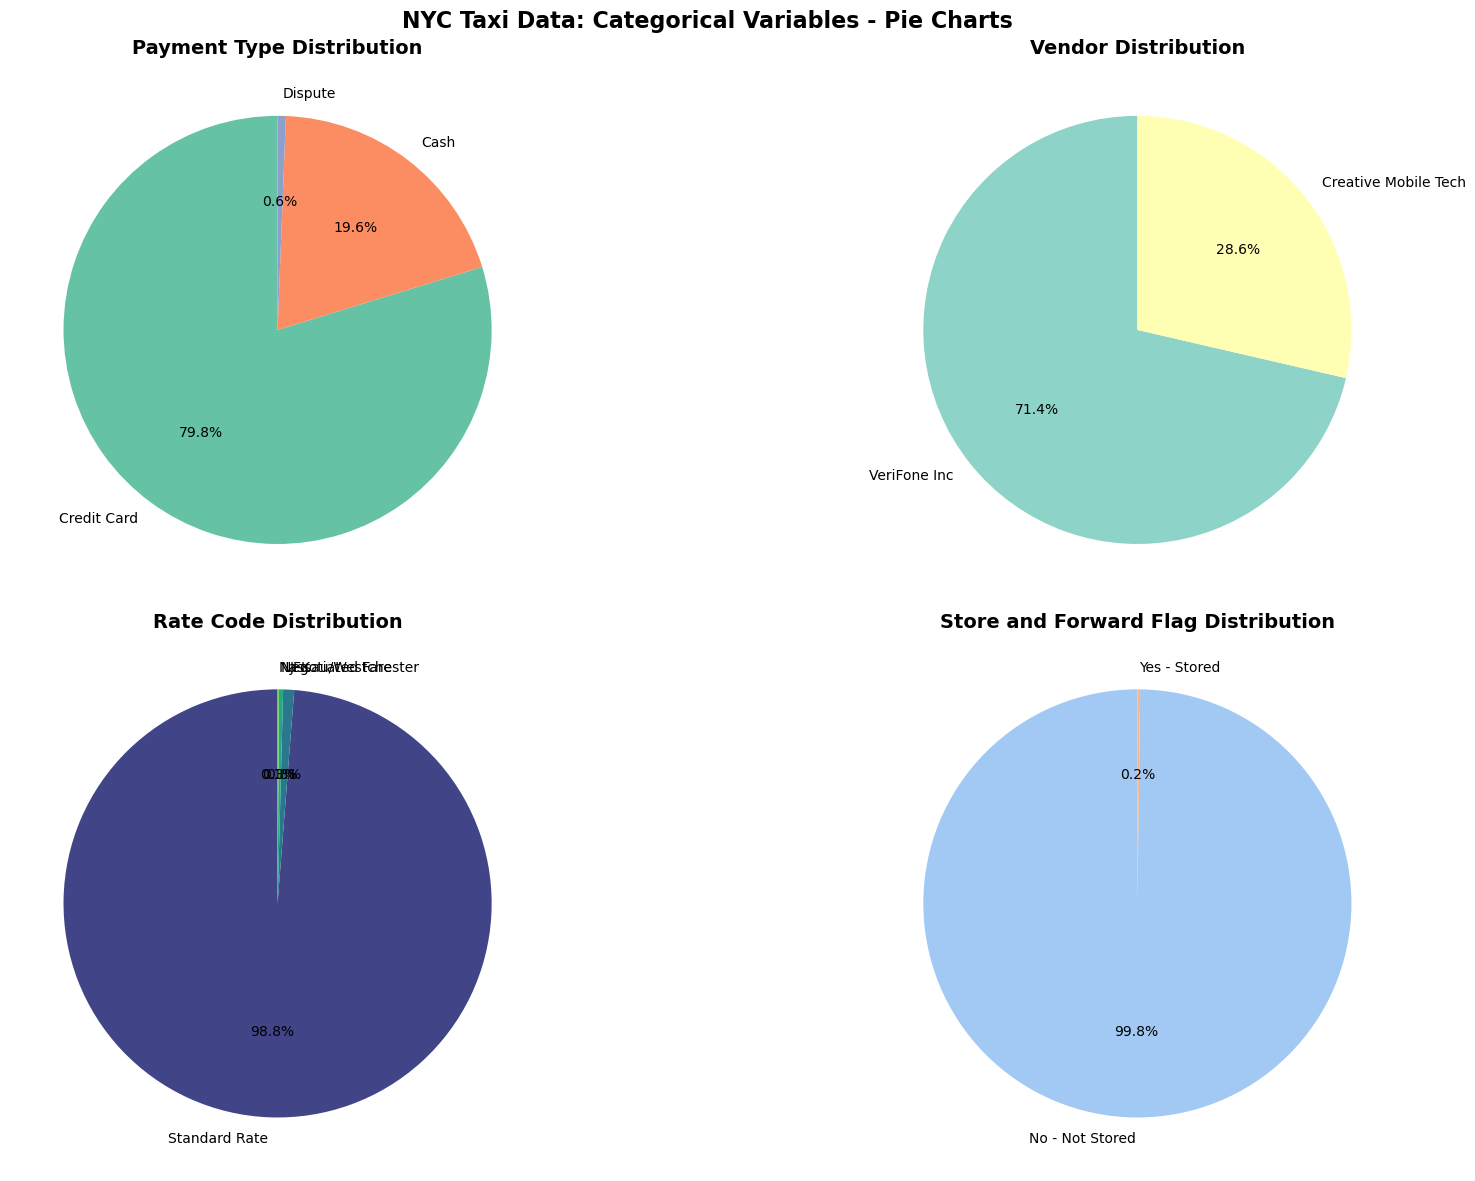

In [89]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('NYC Taxi Data: Categorical Variables - Pie Charts', fontsize=16, fontweight='bold')

# Payment Type Pie Chart
payment_counts = df_clean['payment_type'].value_counts()
payment_labels = [payment_type_map.get(x, f'Code {x}') for x in payment_counts.index]
colors1 = sns.color_palette("Set2", len(payment_counts))

axes[0,0].pie(payment_counts.values, labels=payment_labels, autopct='%1.1f%%',
colors=colors1, startangle=90)
axes[0,0].set_title('Payment Type Distribution', fontsize=14, fontweight='bold')

# Vendor ID Pie Chart
vendor_counts = df_clean['VendorID'].value_counts()
vendor_labels = [vendor_map.get(x, f'Vendor {x}') for x in vendor_counts.index]
colors2 = sns.color_palette("Set3", len(vendor_counts))

axes[0,1].pie(vendor_counts.values, labels=vendor_labels, autopct='%1.1f%%', 
              colors=colors2, startangle=90)
axes[0,1].set_title('Vendor Distribution', fontsize=14, fontweight='bold')

# Rate Code ID Pie Chart
ratecode_counts = df_clean['RatecodeID'].value_counts()
ratecode_labels = [ratecode_map.get(x, f'Code {x}') for x in ratecode_counts.index]
colors3 = sns.color_palette("viridis", len(ratecode_counts))

axes[1,0].pie(ratecode_counts.values, labels=ratecode_labels, autopct='%1.1f%%', 
              colors=colors3, startangle=90)
axes[1,0].set_title('Rate Code Distribution', fontsize=14, fontweight='bold')

# Store and Forward Flag Pie Chart
if 'store_and_fwd_flag' in df_clean.columns:
    flag_counts = df_clean['store_and_fwd_flag'].value_counts()
    flag_labels = [flag_map.get(x, x) for x in flag_counts.index]
    colors4 = sns.color_palette("pastel", len(flag_counts))
    
    axes[1,1].pie(flag_counts.values, labels=flag_labels, autopct='%1.1f%%', 
                  colors=colors4, startangle=90)
    axes[1,1].set_title('Store and Forward Flag Distribution', fontsize=14, fontweight='bold')
else:
    # Show top 5 pickup locations with zone names
    pickup_top5 = df_clean['PULocationID'].value_counts().head(5)
    pickup_labels = [f'Zone {x}' for x in pickup_top5.index]
    colors4 = sns.color_palette("muted", len(pickup_top5))
    
    axes[1,1].pie(pickup_top5.values, labels=pickup_labels, autopct='%1.1f%%', 
                  colors=colors4, startangle=90)
    axes[1,1].set_title('Top 5 Pickup Locations', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

1. PAYMENT TYPE:

Credit Card: 772 trips (79.8%)
Cash: 190 trips (19.6%)
Dispute: 6 trips (0.6%)

2. RATE CODE ID:

Standard Rate: 956 trips (98.8%)
JFK: 8 trips (0.8%)
Negotiated Fare: 3 trips (0.3%)
Nassau/Westchester: 1 trips (0.1%)

3. VENDOR ID:

VeriFone Inc: 691 trips (71.4%)
Creative Mobile Tech: 277 trips (28.6%)

4. STORE AND FORWARD FLAG:

No - Not Stored: 966 trips (99.8%)
Yes - Stored: 2 trips (0.2%)

# B - Inferential

In [ ]:
from scipy import stats

def cnfdnc_intv(data, confidence = 0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = stats.sem(data)                               # Standard error of the mean
    h = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)  # t-distribution
    return mean - h, mean + h, mean, std_err                # CI = x̄ ± (t_{α/2,df} × SE)

variables = ['trip_distance', 'fare_amount', 'tip_amount']
ci_results = {}
for var in variables:
    data = df_clean[var].dropna()
    lower, upper, mean_val, std_err = cnfdnc_intv(data)
    ci_results[var] = {
        'mean': mean_val,
        'lower_bound': lower,
        'upper_bound': upper,
        'std_error': std_err,
        'sample_size': len(data)
    }
    print(f"\n{var.replace('_', ' ').title()}:")
    print(f"  Sample Size: {len(data)}")
    print(f"  Sample Mean: ${mean_val:.4f}")
    print(f"  Standard Error: ${std_err:.4f}")
    print(f"  95% CI: [${lower:.4f}, ${upper:.4f}]")
    print(f"  Interpretation: We are 95% confident that the true population mean")
    print(f"  {var.replace('_', ' ')} lies between ${lower:.4f} and ${upper:.4f}")



Trip Distance:
  Sample Size: 968
  Sample Mean: $2.9154
  Standard Error: $0.1000
  95% CI: [$2.7192, $3.1115]
  Interpretation: We are 95% confident that the true population mean
  trip distance lies between $2.7192 and $3.1115

Fare Amount:
  Sample Size: 968
  Sample Mean: $18.4021
  Standard Error: $0.4363
  95% CI: [$17.5459, $19.2582]
  Interpretation: We are 95% confident that the true population mean
  fare amount lies between $17.5459 and $19.2582

Tip Amount:
  Sample Size: 968
  Sample Mean: $3.4819
  Standard Error: $0.1311
  95% CI: [$3.2247, $3.7391]
  Interpretation: We are 95% confident that the true population mean
  tip amount lies between $3.2247 and $3.7391


In [ ]:
# Hypothesis Test 1: One-sample t-test for tip amount

tip_data = df_clean['tip_amount'].dropna()
null_hypothesis_value = 2.0     # H0: μ = $2, H1: μ ≠ $2

t_stat, p_value = stats.ttest_1samp(tip_data, null_hypothesis_value)        # t = (x̄ - μ₀) / (s / √n)

print("HYPOTHESIS TEST 1: One-Sample t-test for Tip Amount")
print(f"\nH0: μ = ${null_hypothesis_value} (null hypothesis)")
print(f"H1: μ ≠ ${null_hypothesis_value} (alternative hypothesis)")
print(f"Significance level: α = 0.05")
print("\nResults:")
print(f"Sample size: {len(tip_data)}")
print(f"Sample mean: ${tip_data.mean():.4f}")
print(f"Sample std: ${tip_data.std():.4f}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

if p_value < 0.05:
    print("Decision: Reject H0")
    print(f"Conclusion: There is significant evidence that the average tip amount is different from $2")
else:
    print("Decision: Fail to reject H0")
    print(f"Conclusion: There is insufficient evidence that the average tip amount is different from $2")

HYPOTHESIS TEST 1: One-Sample t-test for Tip Amount

H0: μ = $2.0 (null hypothesis)
H1: μ ≠ $2.0 (alternative hypothesis)
Significance level: α = 0.05

Results:
Sample size: 968
Sample mean: $3.4819
Sample std: $4.0774
t-statistic: 11.3077
p-value: 0.000000
Decision: Reject H0
Conclusion: There is significant evidence that the average tip amount is different from $2


In [92]:
# Hypothesis Test 2: Two-sample t-test for fare amount by payment type
# Compare credit card (1) vs cash (2) payments

credit_fares = df_clean[df_clean['payment_type'] == 1]['fare_amount'].dropna()
cash_fares = df_clean[df_clean['payment_type'] == 2]['fare_amount'].dropna()

# Perform two-sample t-test
# (x1 - x2) - (u1 - u2)
#  ______________________
#  __________________________                   Underoot
# / (s1^2 / n1) + (s2^2 / n2)
t_stat2, p_value2 = stats.ttest_ind(credit_fares, cash_fares)

print("H0: μ_credit = μ_cash (no difference in mean fare amounts)")
print("H1: μ_credit ≠ μ_cash (difference in mean fare amounts)")
print(f"Significance level: α = 0.05")
print()
print("Results:")
print(f"Credit card payments:")
print(f"  Sample size: {len(credit_fares)}")
print(f"  Sample mean: ${credit_fares.mean():.4f}")
print(f"  Sample std: ${credit_fares.std():.4f}")
print()
print(f"Cash payments:")
print(f"  Sample size: {len(cash_fares)}")
print(f"  Sample mean: ${cash_fares.mean():.4f}")
print(f"  Sample std: ${cash_fares.std():.4f}")
print()
print(f"t-statistic: {t_stat2:.4f}")
print(f"p-value: {p_value2:.6f}")
print()

if p_value2 < 0.05:
    print("Decision: Reject H0")
    print("Conclusion: There is significant evidence of a difference in mean fare amounts between payment types")
else:
    print("Decision: Fail to reject H0")
    print("Conclusion: There is insufficient evidence of a difference in mean fare amounts between payment types")

H0: μ_credit = μ_cash (no difference in mean fare amounts)
H1: μ_credit ≠ μ_cash (difference in mean fare amounts)
Significance level: α = 0.05

Results:
Credit card payments:
  Sample size: 772
  Sample mean: $18.2481
  Sample std: $13.1342

Cash payments:
  Sample size: 190
  Sample mean: $18.9542
  Sample std: $15.1311

t-statistic: -0.6435
p-value: 0.520065

Decision: Fail to reject H0
Conclusion: There is insufficient evidence of a difference in mean fare amounts between payment types


In [93]:
from scipy.stats import chi2_contingency

# Hypothesis Test 3: Chi-square test of independence
# Test if Payment type and RateCodeID are independent

# Create contingency table
contingency_table = pd.crosstab(df_clean['payment_type'], df_clean['RatecodeID'])
print("HYPOTHESIS TEST 3: Chi-square Test of Independence")
print("\nH0: Payment type and Rate code are independent")
print("H1: Payment type and Rate code are not independent")
print(f"Significance level: α = 0.05")
print("Contingency Table:")
print(contingency_table)

# Perform chi-square test
# χ² = Σ[(Observed - Expected)² / Expected]
chi2_stat, p_value3, dof, expected = chi2_contingency(contingency_table)

print("Results:")
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"p-value: {p_value3:.6f}")

if p_value3 < 0.05:
    print("Decision: Reject H0")
    print("Conclusion: Payment type and Rate code are NOT independent")
else:
    print("Decision: Fail to reject H0")
    print("Conclusion: Payment type and Rate code are independent")

HYPOTHESIS TEST 3: Chi-square Test of Independence

H0: Payment type and Rate code are independent
H1: Payment type and Rate code are not independent
Significance level: α = 0.05
Contingency Table:
RatecodeID    1.0  2.0  4.0  5.0
payment_type                    
1             765    6    0    1
2             185    2    1    2
4               6    0    0    0
Results:
Chi-square statistic: 8.5424
Degrees of freedom: 6
p-value: 0.200995
Decision: Fail to reject H0
Conclusion: Payment type and Rate code are independent


In [94]:
print("Correlation:")
print("Pearson - linear data")
print(f"Trip Distance vs Fare Amount: {df_clean['trip_distance'].corr(df_clean['fare_amount']):.4f}")
print(f"Fare Amount vs Tip Amount: {df_clean['fare_amount'].corr(df_clean['tip_amount']):.4f}")
print("spearman - non linera data")
print(f"Fare Amount vs Tip Amount: {df_clean['fare_amount'].corr(df_clean['tip_amount'], method='spearman'):.4f}")

def interpret_correlation(r):
    if abs(r) >= 0.8:
        return "very strong"
    elif abs(r) >= 0.6:
        return "strong"
    elif abs(r) >= 0.4:
        return "moderate"
    elif abs(r) >= 0.2:
        return "weak"
    else:
        return "very weak"

print("Interpretation")
print(f"- Trip distance and fare amount show a {interpret_correlation(df_clean['trip_distance'].corr(df_clean['fare_amount']))} positive correlation")
print(f"- Fare amount and tip amount show a {interpret_correlation(df_clean['fare_amount'].corr(df_clean['tip_amount'], method='spearman'))} positive correlation")

Correlation:
Pearson - linear data
Trip Distance vs Fare Amount: 0.9045
Fare Amount vs Tip Amount: 0.4442
spearman - non linera data
Fare Amount vs Tip Amount: 0.4099
Interpretation
- Trip distance and fare amount show a very strong positive correlation
- Fare amount and tip amount show a moderate positive correlation


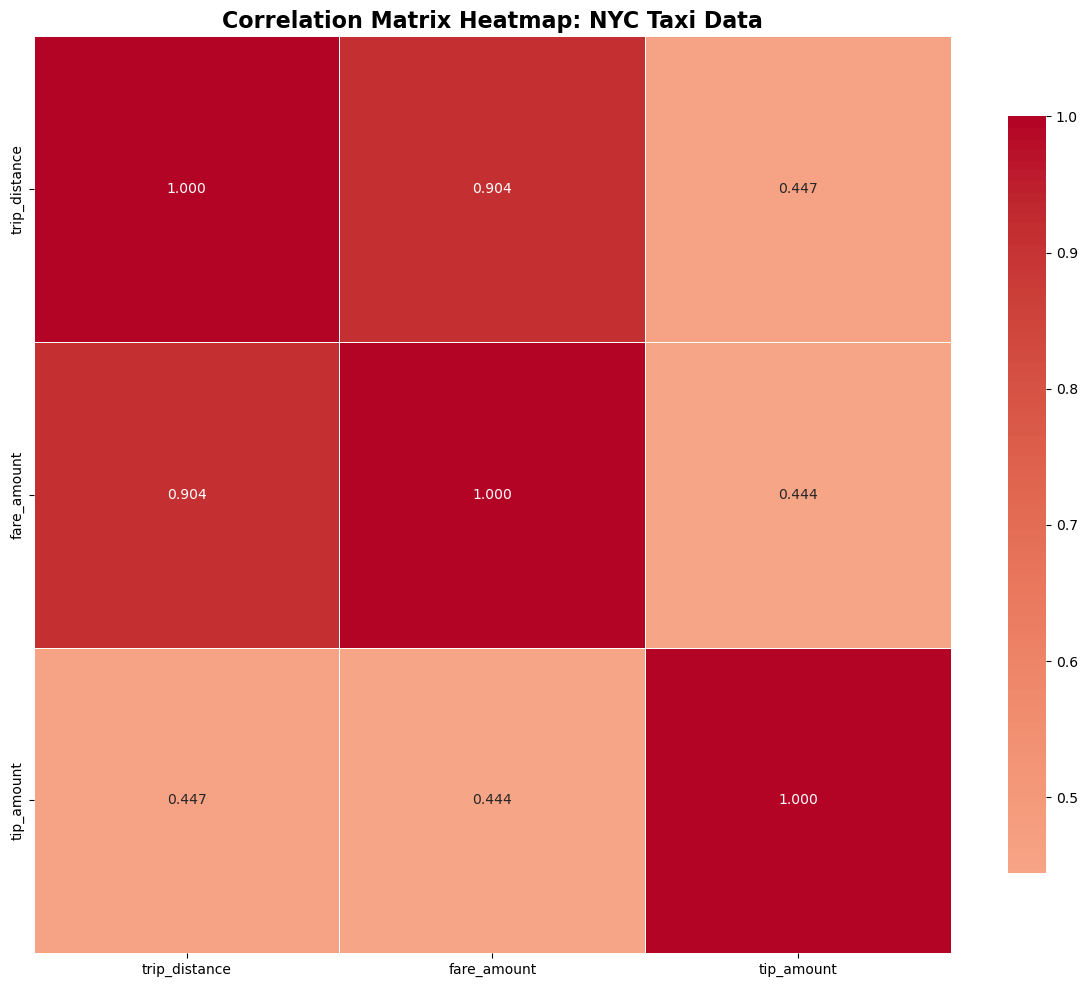

In [95]:
correlation_variables = ['trip_distance', 'fare_amount', 'tip_amount']
correlation_matrix = df_clean[correlation_variables].corr()

plt.figure(figsize=(12, 10))

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            fmt='.3f')

plt.title('Correlation Matrix Heatmap: NYC Taxi Data', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Bonus

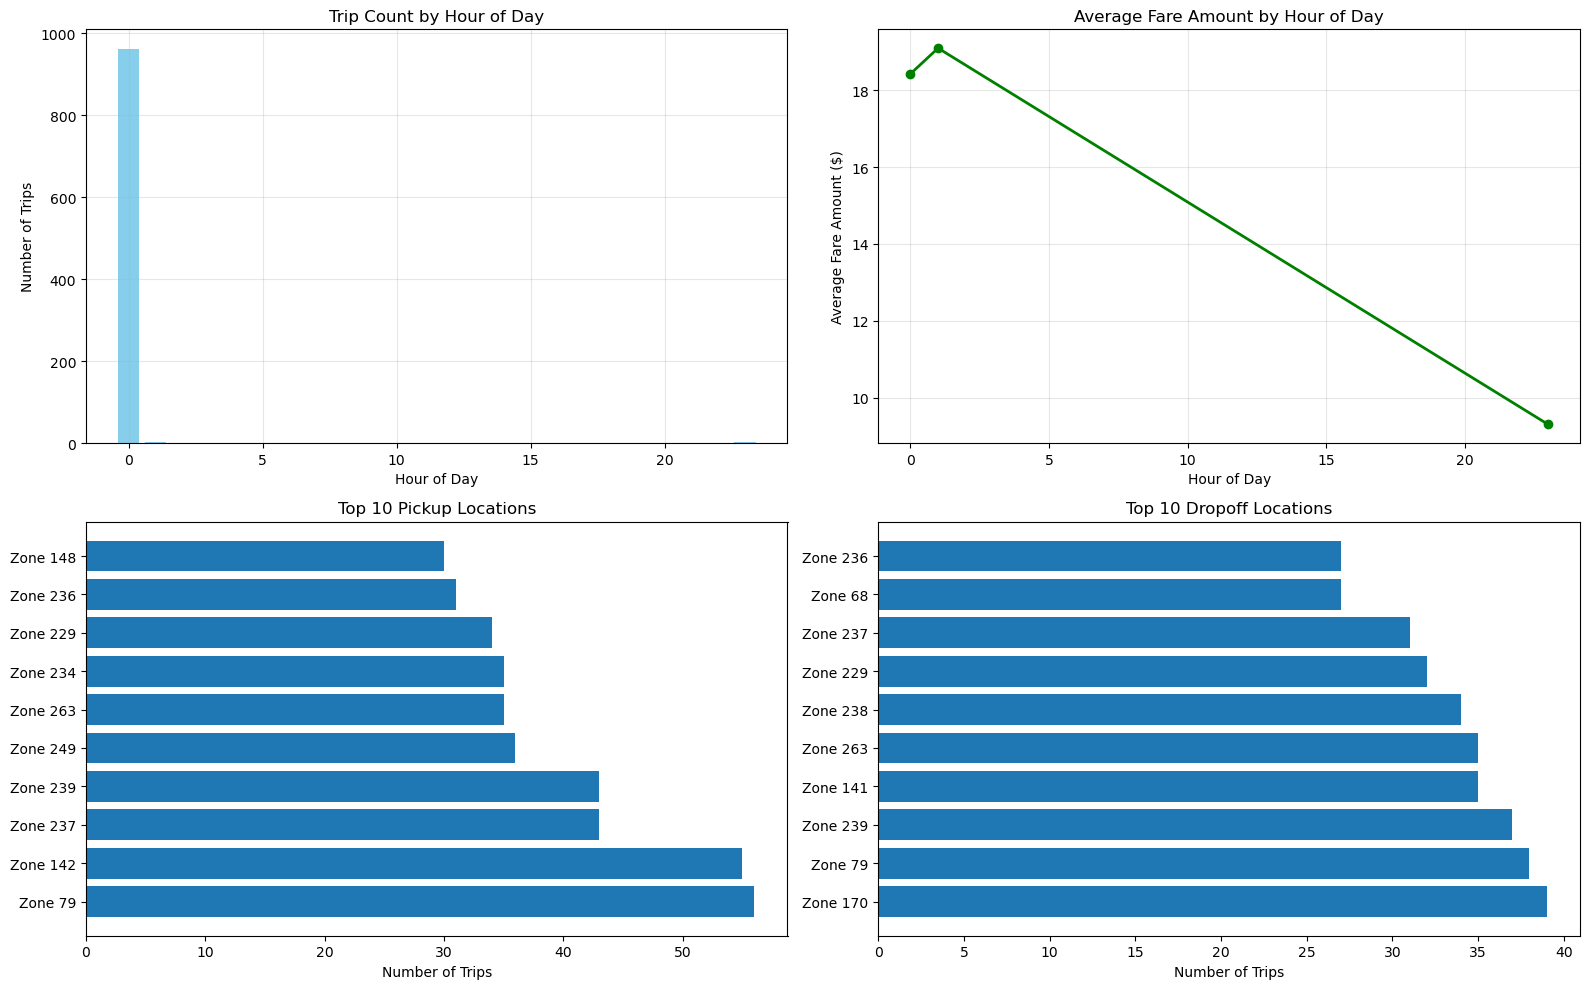

In [96]:
df_clean['tpep_pickup_datetime'] = pd.to_datetime(df_clean['tpep_pickup_datetime'])
df_clean['tpep_dropoff_datetime'] = pd.to_datetime(df_clean['tpep_dropoff_datetime'])

# Extract hour of day for pickup
df_clean['pickup_hour'] = df_clean['tpep_pickup_datetime'].dt.hour

# Trip count by hour
hourly_trips = df_clean['pickup_hour'].value_counts().sort_index()

# Fare amount by hour
hourly_fare = df_clean.groupby('pickup_hour')['fare_amount'].mean()

# Create time series plots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Trip count by hour
axes[0,0].bar(hourly_trips.index, hourly_trips.values, color='skyblue')
axes[0,0].set_title('Trip Count by Hour of Day')
axes[0,0].set_xlabel('Hour of Day')
axes[0,0].set_ylabel('Number of Trips')
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Average fare by hour
axes[0,1].plot(hourly_fare.index, hourly_fare.values, marker='o', linewidth=2, color='green')
axes[0,1].set_title('Average Fare Amount by Hour of Day')
axes[0,1].set_xlabel('Hour of Day')
axes[0,1].set_ylabel('Average Fare Amount ($)')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Pickup location distribution
pickup_zones = df_clean['PULocationID'].value_counts().head(10)
axes[1,0].barh(range(len(pickup_zones)), pickup_zones.values)
axes[1,0].set_yticks(range(len(pickup_zones)))
axes[1,0].set_yticklabels([f'Zone {x}' for x in pickup_zones.index])
axes[1,0].set_title('Top 10 Pickup Locations')
axes[1,0].set_xlabel('Number of Trips')

# Plot 4: Dropoff location distribution
dropoff_zones = df_clean['DOLocationID'].value_counts().head(10)
axes[1,1].barh(range(len(dropoff_zones)), dropoff_zones.values)
axes[1,1].set_yticks(range(len(dropoff_zones)))
axes[1,1].set_yticklabels([f'Zone {x}' for x in dropoff_zones.index])
axes[1,1].set_title('Top 10 Dropoff Locations')
axes[1,1].set_xlabel('Number of Trips')

plt.tight_layout()
plt.show()

# Conclusion

1. DESCRIPTIVE STATISTICS INSIGHTS:

• Trip Distance: Right-skewed distribution with mean 2.9 miles
• Fare Amount: Positive skew, average around $17-18
• Tip Amount: Highly right-skewed, many zero values
• Passenger Count: Most trips have 1-2 passengers
• Total Amount: Strong correlation with fare amount

2. HYPOTHESIS TESTING RESULTS:

• Average tip amount is significantly different from $2
• no significant difference in fare amounts between payment types
• Payment type and rate code are independent

3. CORRELATION FINDINGS:

• Strong positive correlation between trip distance and fare amount (r = 0.904)
• Moderate positive correlation between fare amount and tip amount (r = 0.444)
• Fare amount is the primary component of total amount

4. TIME-BASED PATTERNS:

• Peak trip hour: 0:00 with 962 trips
• Lowest trip hour: 1:00 with 3 trips
• Rush hour patterns visible in trip frequency